In [ ]:
%cd drive/MyDrive/KetkiAmbekar/Raw\ Data\ Files
%pwd

/content/drive/.shortcut-targets-by-id/557/KetkiAmbekar/Raw Data Files


'/content/drive/.shortcut-targets-by-id/557/KetkiAmbekar/Raw Data Files'

In [ ]:
#Load Dataset 
import pandas as pd

df = pd.read_csv("covid_real_estate.csv",  parse_dates=True)

### We drop transactions values below a $100,000 because those are probably rent transactions and it is not feasible to buy a house in NYC for that amount


In [ ]:
df=df[df['sales_price']>=100000]
df.shape

(100688, 77)

In [ ]:
df.head(100)

,borough,neighborhood,building_class_category,tax_class,block,lot,building_class_present,address,zipcode,ownername,yearbuilt,tax_class_sale,building_class_sale,cd,ct2010,cb2010,schooldist,council,firecomp,policeprct,healthcenterdistrict,healtharea,sanitboro,sanitdistrict,sanitsub,zonedist1,splitzone,landuse,easements,residential_unit,commercial_unit,total_unit,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearalter1,yearalter2,builtfar,residfar,commfar,facilfar,borocode,bbl,xcoord,ycoord,zonemap,sanborn,taxmap,latitude,longitude,sales_price,sales_date,covid_cases
0,BK,CROWN HEIGHTS,08 RENTALS - ELEVATOR APARTMENTS,2,1206,28,D1,1232 PACIFIC STREET,11216,PACIFIC 1234 LLC,1905.0,2,D1,308.0,315.00,4001.0,17.0,36.0,E219,77.0,32.0,2900.0,3.0,8.0,2A,R6A,N,3.0,0.0,36.0,0.0,36.0,7094.0,29772.0,0.0,29772.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,6.0,36.0,36.0,62.0,114.0,62.0,91.0,N,0.0,N,5.0,0.0,42750.0,1096200.0,0.0,0.0,0.0,4.2,3.00,0.0,3.0,3,3012060028,997849.0,186100.0,17a,305 049,30501.0,40.677468,-73.950972,5585336,8/31/2020,1608
1,BK,OCEAN HILL,41 TAX CLASS 4 - OTHER,4,1492,20,Z9,1546 BROADWAY,11221,ROL 1546 LLC,0.0,4,Z9,316.0,373.00,1003.0,23.0,41.0,E233,73.0,34.0,3100.0,3.0,4.0,3A,R6,N,NaN,0.0,0.0,0.0,0.0,2600.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,0.0,0.0,0.0,26.0,100.0,0.0,0.0,N,0.0,Y,5.0,0.0,39150.0,52650.0,0.0,0.0,0.0,0.0,2.43,0.0,4.8,3,3014920020,1007422.0,189216.0,17a,305 045,30601.0,40.686001,-73.916449,1380000,8/31/2020,1608
2,BK,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,1838,59,B9,151 HALSEY STREET,11216,"HOLDER, PAUL",1892.0,1,B9,303.0,249.00,3000.0,13.0,36.0,E235,79.0,32.0,2800.0,3.0,3.0,2B,R6B,N,1.0,0.0,2.0,0.0,2.0,2000.0,3600.0,0.0,2700.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,2.0,2.0,20.0,100.0,20.0,45.0,N,3.0,N,5.0,1.0,16380.0,116520.0,0.0,0.0,0.0,1.8,2.00,0.0,2.0,3,3018380059,998766.0,187858.0,17a,305 030,30611.0,40.682292,-73.947663,1643000,8/31/2020,1608
3,BK,WILLIAMSBURG-CENTRAL,03 THREE FAMILY DWELLINGS,1,2232,7,C0,209 LEE AVENUE,11206,"JACOBOWITZ, SOLOMON",1899.0,1,C0,301.0,531.00,4000.0,14.0,33.0,E211,90.0,30.0,1420.0,3.0,1.0,4B,R6,N,2.0,0.0,3.0,0.0,3.0,1500.0,2994.0,0.0,2994.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,3.0,3.0,20.0,75.0,20.0,67.0,N,2.0,N,5.0,2.0,14460.0,88140.0,0.0,0.0,0.0,2.0,2.43,0.0,4.8,3,3022320007,996661.0,194967.0,13b,303 027,30803.0,40.701807,-73.955239,1200000,8/31/2020,1608
4,BK,CYPRESS HILLS,01 ONE FAMILY DWELLINGS,1,3886,58,A5,326 HIGHLAND BOULEVARD,11207,"GONZALEZ, ERIC",1975.0,1,A5,305.0,1142.02,1002.0,19.0,37.0,L175,75.0,34.0,3820.0,3.0,5.0,1C,R3-1,N,1.0,0.0,1.0,0.0,1.0,2754.0,2205.0,0.0,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,53.0,57.0,35.0,21.0,N,2.0,Y,5.0,1.0,15420.0,36600.0,1410.0,0.0,0.0,0.8,0.50,0.0,1.0,3,3038860058,1014592.0,188249.0,17c,308 004,31301.0,40.683325,-73.890600,735000,8/31/2020,1608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,BK,OCEAN PARKWAY-SOUTH,36 OUTDOOR RECREATIONAL FACILITIES,4,7105,82,Q9,2116 EAST 3RD STREET,11223,2056 EAST 5TH STREET LLC,1925.0,4,Q9,315.0,396.00,1001.0,21.0,47.0,E254,61.0,37.0,8610.0,3.0,15.0,1D,R3-1,N,9.0,0.0,2.0,0.0,2.0,4200.0,2136.0,0.0,1372.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,42.0,100.0,17.0,38.0,NaN,0.0,N,5.0,5.0,346500.0,346500.0,0.0,0.0,0.0,0.5,0.50,0.0,1.0,3,3071050082,992807.0,157332.0,28c,314 045,32105.0,40.598512,-73.969186,5400000,8/26/2020,1608
101,BK,OCEAN PARKWAY-SOUTH,01 ONE FAMILY DWELLINGS,1,7107,157,A1,2056 EAST 5TH STREET,11223,EAST 3RD STREET CATTON LLC,1925.0,1,A1,315.0,414.02,2004.0,21.0,47.0,E254,61.0,37.0,8510.0,3.0,15.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100688 entries, 0 to 124536
Data columns (total 77 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   borough                  100688 non-null  object        
 1   neighborhood             100688 non-null  object        
 2   building_class_category  100688 non-null  object        
 3   tax_class                100687 non-null  object        
 4   block                    100688 non-null  int64         
 5   lot                      100688 non-null  int64         
 6   building_class_present   100687 non-null  object        
 7   address                  100688 non-null  object        
 8   zipcode                  100688 non-null  int64         
 9   ownername                100671 non-null  object        
 10  yearbuilt                100675 non-null  float64       
 11  tax_class_sale           100688 non-null  int64         
 12  building_class_s

In [ ]:
df.shape

(100688, 77)

In [ ]:
df['sales_date'] =  pd.to_datetime(df['sales_date'])

In [ ]:
#Visualize Sales Prices

##Understanding how **sales_date** data is distributed

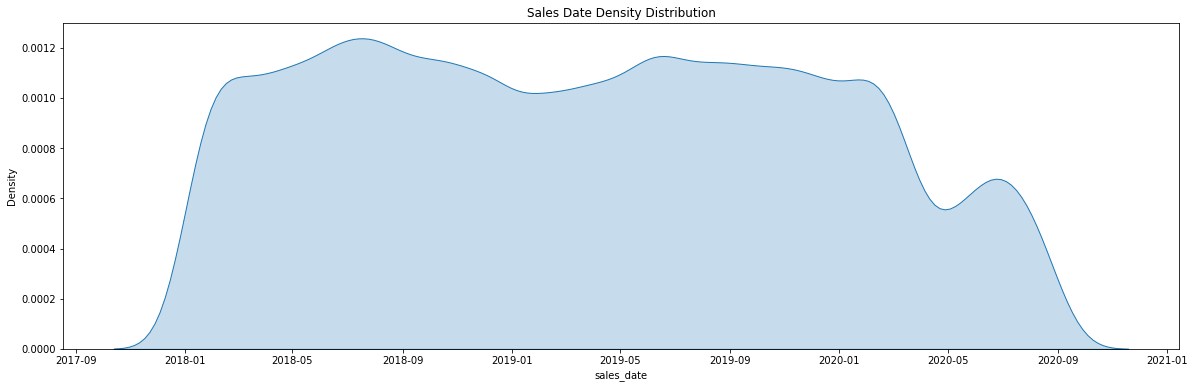

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
plt.title("Sales Date Density Distribution")
sns.kdeplot(data=df['sales_date'], shade='True');

We see that our data ranges from late (November) 2017 to (November) 2020. 

In [ ]:
#Aggregating Sales Data and Covid Data and Avg price for Line Plot
trends=df[['sales_date', 'sales_price', 'covid_cases']]
trends.head(10)

,sales_date,sales_price,covid_cases
0,2020-08-31,5585336,1608
1,2020-08-31,1380000,1608
2,2020-08-31,1643000,1608
3,2020-08-31,1200000,1608
4,2020-08-31,735000,1608
5,2020-08-31,775000,1608
6,2020-08-31,6650000,1608
7,2020-08-31,1375000,1608
8,2020-08-31,287000,1608
9,2020-08-31,3800000,1608


In [ ]:
trends['copy']= trends.sales_price
trends

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sales_date,sales_price,covid_cases,copy
0,2020-08-31,5585336,1608,5585336
1,2020-08-31,1380000,1608,1380000
2,2020-08-31,1643000,1608,1643000
3,2020-08-31,1200000,1608,1200000
4,2020-08-31,735000,1608,735000
...,...,...,...,...
124527,2018-01-02,680000,0,680000
124528,2018-01-02,400000,0,400000
124530,2018-01-02,565000,0,565000
124534,2018-01-02,499500,0,499500


In [ ]:
trends=trends.groupby(['sales_date'], as_index=True).agg({'sales_price':'mean', 
                                                          'covid_cases':'max'})
trends.head(10)

,sales_price,covid_cases
sales_date,,
2018-01-01,2.372938e+05,0
2018-01-02,1.055250e+06,0
2018-01-03,1.001782e+06,0
2018-01-04,1.419783e+06,0
2018-01-05,8.852856e+05,0
2018-01-07,4.500000e+05,0
2018-01-08,8.425694e+05,0
2018-01-09,3.266095e+06,0
2018-01-10,3.011447e+06,0


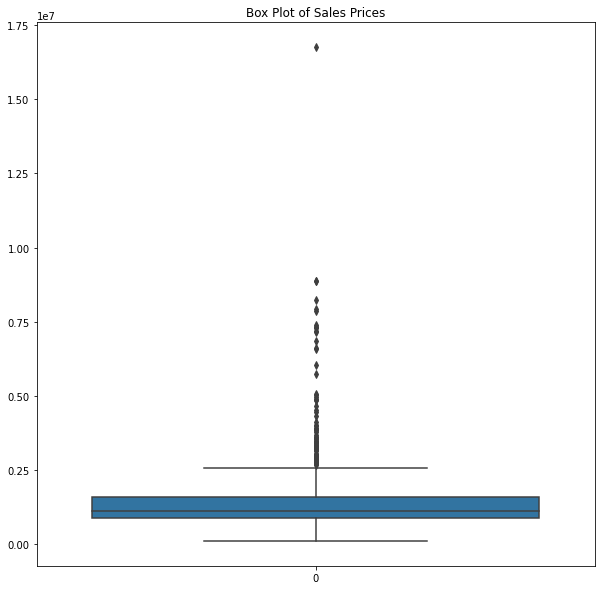

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Box Plot of Sales Prices")
sns.boxplot(data=trends['sales_price']);

We see that the median sales price is at around $1 million. The distribution is skewed to the right.  We don't have too many outliers in the data

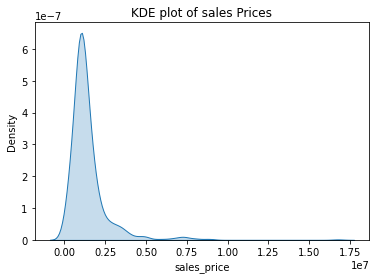

In [ ]:
plt.title("KDE plot of sales Prices")
sns.kdeplot(data=trends['sales_price'], shade=True);

In [ ]:
trends.shape

(842, 2)

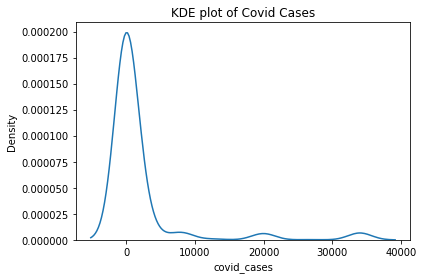

In [ ]:
#Checking the values of Covid Cases at a glance
plt.title("KDE plot of Covid Cases")
sns.kdeplot(data=trends['covid_cases']);

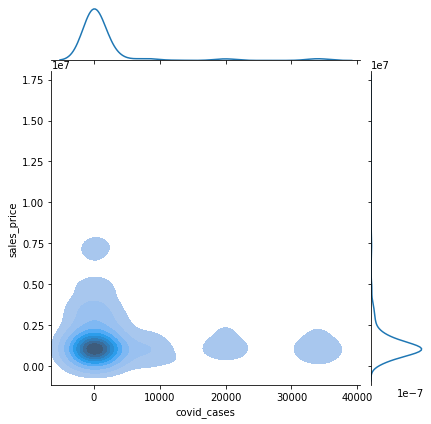

In [ ]:
#Joint KDE plot of 
sns.jointplot(x=trends['covid_cases'], y=trends['sales_price'], kind="kde", shade=True);

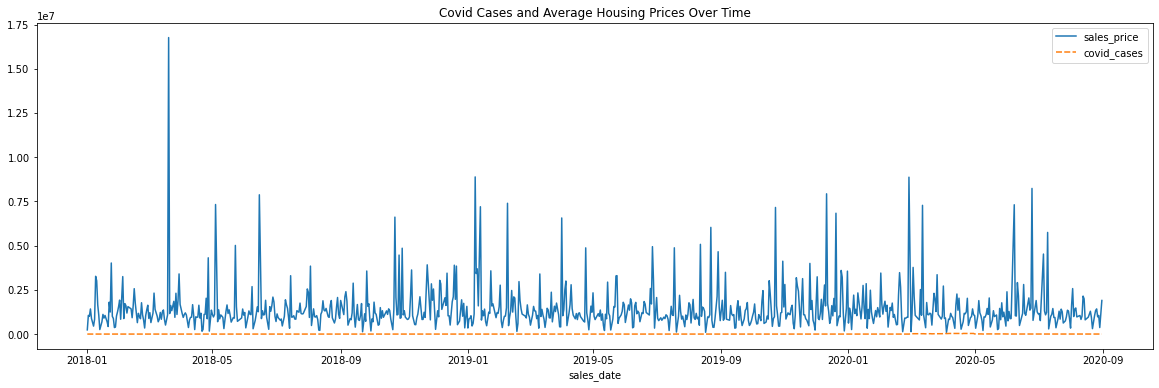

In [ ]:
plt.figure(figsize=(20,6))
plt.title("Covid Cases and Average Housing Prices Over Time")

sns.lineplot(data=trends);

We barely can make out anything from this lineplot. We need to normalize our data, for it to make any sense. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = trends[['sales_price', 'covid_cases']].values #returns a numpy array
x
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled.shape


(842, 2)

In [ ]:
import numpy as np
trends['scaled_sales_price']= x_scaled[:,0]
trends['scaled_covid_cases']= x_scaled[:,1]
trends.head()

,sales_price,covid_cases,scaled_sales_price,scaled_covid_cases
sales_date,,,,
2018-01-01,2.372938e+05,0,0.008239,0.0
2018-01-02,1.055250e+06,0,0.057323,0.0
2018-01-03,1.001782e+06,0,0.054115,0.0
2018-01-04,1.419783e+06,0,0.079198,0.0
2018-01-05,8.852856e+05,0,0.047124,0.0


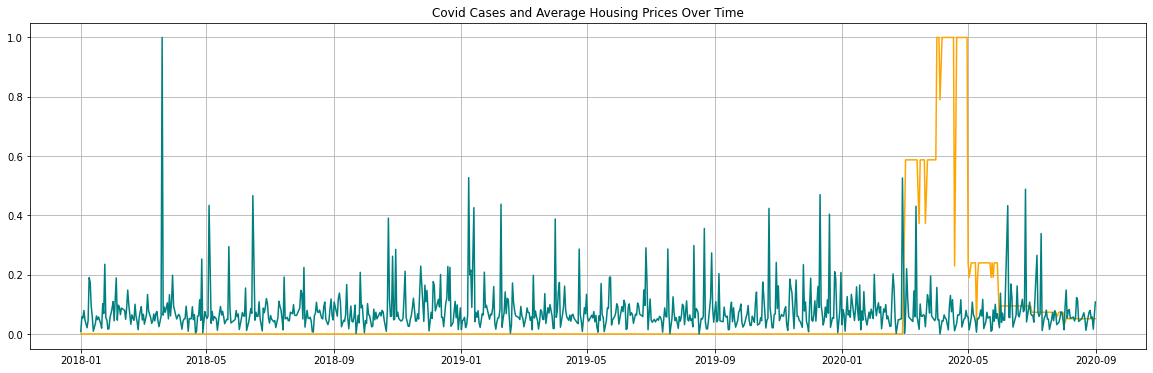

In [ ]:
#Plotting Normalized Prices and Covid Cases
plt.figure(figsize=(20,6))
plt.title("Covid Cases and Average Housing Prices Over Time")
plt.plot(trends['scaled_covid_cases'], linestyle='solid', color='orange')
plt.plot(trends['scaled_sales_price'], linestyle='solid', color='teal')
plt.grid(True)
#sns.lineplot(data=trends.drop(['sales_price', 'covid_cases'], axis=1));

We notice that there is a surge in the avg sales prices in the months of feb,march and oct, dec. Possibly due to temperature trends during these times.

We do see a trend here. But Let's smooth the blue line

In [ ]:
#Let's add a rolling average to this lineplot for our sanity. 

trends['weekly_rolling_avg']= trends.scaled_sales_price.rolling(7).mean()
trends.head(10)



,sales_price,covid_cases,scaled_sales_price,scaled_covid_cases,weekly_rolling_avg
sales_date,,,,,
2018-01-01,2.372938e+05,0,0.008239,0.0,NaN
2018-01-02,1.055250e+06,0,0.057323,0.0,NaN
2018-01-03,1.001782e+06,0,0.054115,0.0,NaN
2018-01-04,1.419783e+06,0,0.079198,0.0,NaN
2018-01-05,8.852856e+05,0,0.047124,0.0,NaN
2018-01-07,4.500000e+05,0,0.021003,0.0,NaN
2018-01-08,8.425694e+05,0,0.044560,0.0,0.044509
2018-01-09,3.266095e+06,0,0.189993,0.0,0.070474
2018-01-10,3.011447e+06,0,0.174712,0.0,0.087244


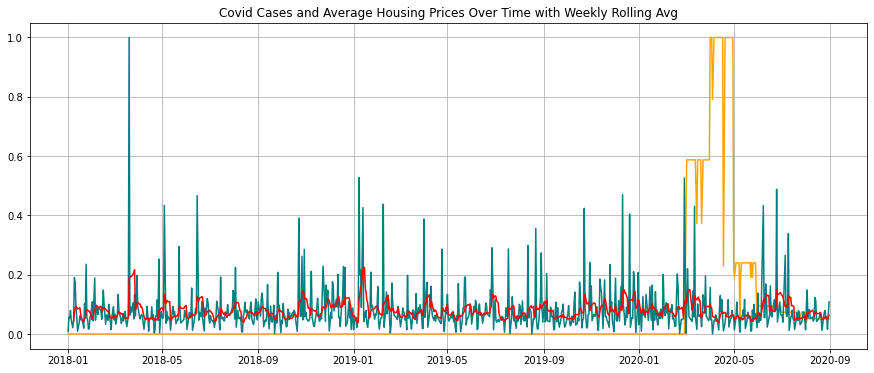

In [ ]:
#Plotting Normalized Prices and Covid Cases
plt.figure(figsize=(15,6))
plt.title("Covid Cases and Average Housing Prices Over Time with Weekly Rolling Avg")
plt.grid(True)
plt.plot(trends['scaled_covid_cases'], linestyle='solid', color='orange')
plt.plot(trends['scaled_sales_price'], linestyle='solid', color='teal')
plt.plot(trends['weekly_rolling_avg'], linestyle='solid', color='red')
#plt.plot(trends['copy'], linestyle='solid', color='green')
plt.style.use("default")
#sns.lineplot(data=trends.drop(['sales_price', 'covid_cases'], axis=1), linestyle='solid');

Let's only consider Years 2019 and 2020

In [ ]:
trends19_20=trends.loc['2019-08-01':'2020-12-31']

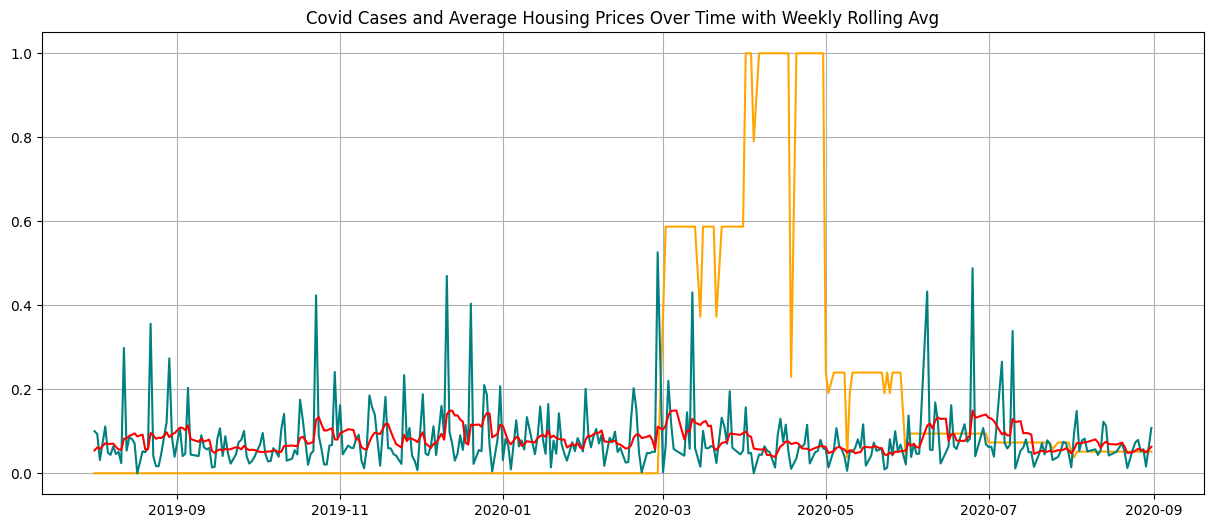

In [ ]:
#Plotting Normalized Prices and Covid Cases
plt.figure(figsize=(15,6))
plt.title("Covid Cases and Average Housing Prices Over Time with Weekly Rolling Avg")
plt.grid(True)
plt.plot(trends19_20['scaled_covid_cases'], linestyle='solid', color='orange')
plt.plot(trends19_20['scaled_sales_price'], linestyle='solid', color='teal')
plt.plot(trends19_20['weekly_rolling_avg'], linestyle='solid', color='red');
#sns.lineplot(data=trends.loc['2019-08-01':'2020-12-31'].drop(['sales_price', 'covid_cases'], axis=1), linestyle='solid');

We see that peaks are prominently absent on days of high covid cases

This is however a birds eye view of the sales prices taken as a while. NYC has stark differences in property prices varying with different boroughs. We aim to explore the same with a geoplot. 